In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [3]:
asylum = pd.read_csv(r'C:\Users\ioana\OneDrive\Escritorio\Entorno10\Refugee_project_study\Refugees-flow-study-project\Data\asylum_decisions.csv')
population = pd.read_csv(r'C:\Users\ioana\OneDrive\Escritorio\Entorno10\Refugee_project_study\Refugees-flow-study-project\Data\population.csv')

In [4]:
population.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
0,2023,Philippines,PHL,Poland,POL,5,0,0,-,0,0,0
1,2023,South Africa,ZAF,Poland,POL,6,0,0,-,0,0,0
2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,-,0,0,0
3,2023,Rwanda,RWA,Poland,POL,5,0,0,-,0,0,0
4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,-,0,0,0


Refugees include individuals recognized under the 1951 Convention relating to the Status of Refugees, its 1967 Protocol, the 1969 Organization of African Unity (OAU) Convention Governing the Specific Aspects of Refugee Problems in Africa, the refugee definition contained in the 1984 Cartagena Declaration on Refugees as incorporated into national laws, those recognized in accordance with the UNHCR Statute, individuals granted complementary forms of protection, and those enjoying temporary protection. The refugee population also includes people in refugee-like situations.<br>

Asylum-seekers are individuals who have sought international protection and whose claims for refugee status have not yet been determined. <br>

Internally displaced persons (IDPs) are persons or groups of persons who have been forced or obliged to flee or to leave their homes or places of habitual residence, in particular as a result of, or in order to avoid the effects of armed conflict, situations of generalized violence, violations of human rights or natural or human-made disasters, and who have not crossed an internationally recognized State border. For the purposes of UNHCR’s statistics, this population includes only conflict-generated IDPs to whom the Office extends protection and/or assistance. The IDP population also includes people in an IDP-like situation.<br>

Other people in need of international protection refers to people who are outside their country or territory of origin, typically because they have been forcibly displaced across international borders, who have not been reported under other categories (asylum-seekers, refugees, people in refugee-like situations) but who likely need international protection, including protection against forced return, as well as access to basic services on a temporary or longer-term basis.<br>

Stateless People as those not considered as nationals by any State under the operation of its law. In other words, they do not possess the nationality of any State. UNHCR statistics refer to people who fall under the organization’s statelessness mandate as those who are stateless according to this international definition. Data from some countries may also include people with undetermined nationality. These are people who lack proof of possession of any nationality and at the same time have or are regarded as having important links to more than one State. UNHCR also works with populations at risk of statelessness, but persons at risk of statelessness are not reported on under the statistical category of individuals under UNHCR’s statelessness mandate.<br>

Host community refers to a community that hosts large populations of refugees or internally displaced persons, whether in camps, integrated into households, or independently. UNHCR reports on host communities in countries with substantive programmes focusing on sharing the burden of hosting large refugee populations, as set out in the Global Compact on Refugees.<br>

Other groups or persons of concern refers to individuals who do not necessarily fall directly into any of these groups above but to whom UNHCR has extended its protection and/or assistance services, based on humanitarian or other special grounds.

In [20]:
population.isnull().sum()   

Year                                                0
Country of origin                                   0
Country of origin (ISO)                             0
Country of asylum                                   0
Country of asylum (ISO)                             0
Refugees under UNHCR's mandate                      0
Asylum-seekers                                      0
IDPs of concern to UNHCR                            0
Other people in need of international protection    0
Stateless persons                                   0
Host Community                                      0
Others of concern                                   0
dtype: int64

In [14]:
# No eliminar stateless person sino agrupar por pais de asilo. Vamos a ver si las personas viajan a paises cercanos y así podemos deducir que los refugiados stateless provienen en su gran mayoría de ciertas áreas. 
#agrupar por pais de origen y sumar los stateless persons 
population.groupby(['Country of asylum'])['Stateless persons'].sum().nlargest(20)

Country of asylum
Thailand              14138030
Myanmar               13276638
Cote d'Ivoire          9581213
Nepal                  7801762
Bangladesh             7192879
Latvia                 5746592
Syrian Arab Rep.       4312000
Estonia                1891145
Iraq                   1840197
Kuwait                 1819106
Russian Federation     1706567
Saudi Arabia           1330000
Malaysia                924003
Ukraine                 889671
Uzbekistan              683372
Kenya                   662657
Dominican Rep.          553770
Sweden                  475381
Cambodia                397332
Viet Nam                335900
Name: Stateless persons, dtype: int64

In [16]:
population.groupby(['Country of origin'])['Host Community'].sum()

Country of origin
Afghanistan       0000000000000000000000000000000000000000000000...
Albania           0000000000000000000000000000000000000000000000...
Algeria           0000000000000000000000000000000000000000000000...
Andorra                              000---------------------------
Angola            0000000000000000000000000000000000000000000000...
                                        ...                        
Viet Nam          0000000000000000000000000000000000000000000000...
Western Sahara    00000000000000000000000000--------------------...
Yemen             0000000000000000000000000000000000000000000000...
Zambia            00000000000000000000000000000000000-----------...
Zimbabwe          0000000000000000000000000000000000000000000000...
Name: Host Community, Length: 214, dtype: object

In [18]:
population['Host Community'].unique()

array(['0', '12002', '49305', '454831', '15765482', '2581900', '7576',
       '1700', '401356', '1400000', '14521', '3365', '827077', '81620',
       '174850', '13666', '83995', '876000', '3051', '947281', '1038257',
       '406161', '1224393', '96800', '2155', '617687', '81619', '5480',
       '1102358', '640', '11972', '85061', '371594', '15209720', '5433',
       '9346', '596148', '4200', '878451', '-', '3581', '500353', '8165',
       '391', '250000', '4605', '2428906', '4020', '6000', '5226',
       '110526', '741889', '1863', '1301', '84953', '5892', '494710',
       '68880', '9201', '26596', '154150', '472000', '44000', '2351313',
       '2304506'], dtype=object)

<Axes: xlabel='Year'>

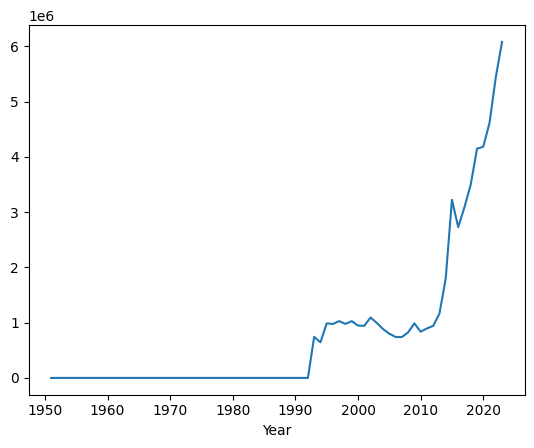

In [23]:
#quiero ver como evoluciona el numero de refugiados en el tiempo en una grafica de linea
population.groupby(['Year'])['Asylum-seekers'].sum().plot(kind='line')

#No había datos de asylum seekers hasta el año 1990 y algo?

<Axes: xlabel='Year'>

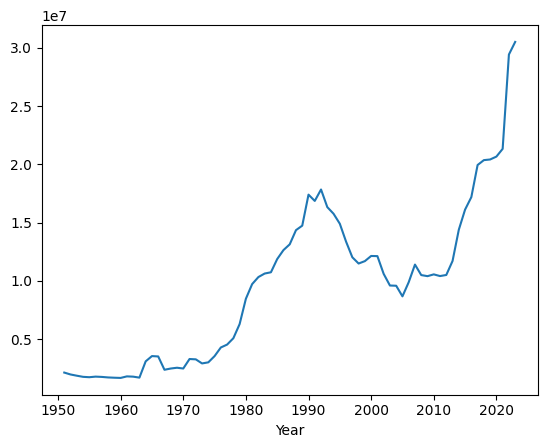

In [24]:
population.groupby(['Year'])['Refugees under UNHCR\'s mandate'].sum().plot(kind='line')

<Axes: xlabel='Year'>

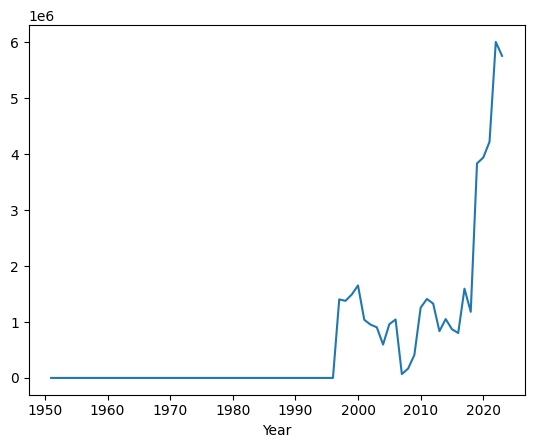

In [26]:
population.groupby(['Year'])['Others of concern'].sum().plot(kind='line')

In [32]:
population['Other people in need of international protection'].unique() 

array(['-', '10878', '23628', '17000', '14000', '51156', '146559', '311',
       '980470', '214771', '15428', '310148', '436060', '2452890',
       '18900', '114805', '495481', '19635', '53027', '146696', '1004',
       '969817', '165174', '13531', '264040', '436845', '2453862',
       '16598', '14178', '23023', '113722', '495304', '128000', '1910',
       '791442', '60', '8403', '14995', '5', '25', '175992', '92',
       '500271', '1842390', '21766', '116000', '503882', '234', '1469',
       '25800', '164622', '11805', '67', '63179', '81847', '118937',
       '2879', '515039', '19', '171659', '9557', '163754', '39', '454547',
       '1729537', '22401', '114050', '401777', '23307', '4663', '14063',
       '14', '21', '16691', '38', '11', '16602', '16190', '115768',
       '3588', '377864', '7664', '14362', '5472', '123507', '52',
       '452712', '1771237', '20828', '33816', '374045', '173343', '22000',
       '121', '52982', '42104', '94400', '803', '428214', '127152',
       '39771',

In [33]:
#reemplazar los valores '-' por np.nan en la columna 'Other people in need of international protection'
population['Other people in need of international protection'] = population['Other people in need of international protection'].replace('-', np.nan)

In [37]:
population.shape

(125689, 13)

In [36]:
population['Other people in need of international protection'].isnull().sum()

125572

In [38]:
#ELimino la columna other people in need of international protection porque tiene muchos valores nulos y no me aporta información. 
population = population.drop(columns=['Other people in need of international protection'])

In [39]:
# hacer una nueva columna que sea la suma de los tres tipos de refugiados
population['Total refugees'] = population['Refugees under UNHCR\'s mandate'] + population['Asylum-seekers'] + population['IDPs of concern to UNHCR']

<Axes: xlabel='Year'>

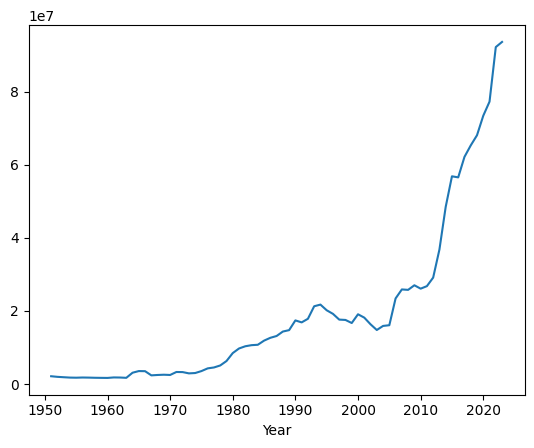

In [40]:
population.groupby(['Year'])['Total refugees'].sum().plot(kind='line')

In [29]:
population

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern,Total refugees
0,2023,Philippines,PHL,Poland,POL,5,0,0,-,0,0,0,5
1,2023,South Africa,ZAF,Poland,POL,6,0,0,-,0,0,0,6
2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,-,0,0,0,3386
3,2023,Rwanda,RWA,Poland,POL,5,0,0,-,0,0,0,5
4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,-,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125684,1951,Unknown,UNK,Switzerland,CHE,10000,0,0,-,0,-,0,10000
125685,1951,Unknown,UNK,Tunisia,TUN,2000,0,0,-,0,-,0,2000
125686,1951,Unknown,UNK,Türkiye,TUR,2700,0,0,-,0,-,0,2700
125687,1951,Unknown,UNK,United States of America,USA,350000,0,0,-,0,-,0,350000
